<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/EC/Full_%26_Unused_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
importlink = "https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/EC/Lo/Lotraj1_150410_2_Cine1_Np008251_Lo-02_precision_3p15nm.txt"
lo_t1_list = np.genfromtxt(importlink)

In [0]:
#both of these are INCLUSIVE
min_d_const = 1
max_d_const = 3

In [0]:
lo_t1_list

array([[1.02246739, 1.81729806],
       [1.02642557, 1.82166854],
       [1.01819847, 1.81841909],
       ...,
       [0.94730001, 2.19704923],
       [0.94648912, 2.20346084],
       [0.93773464, 2.19928337]])

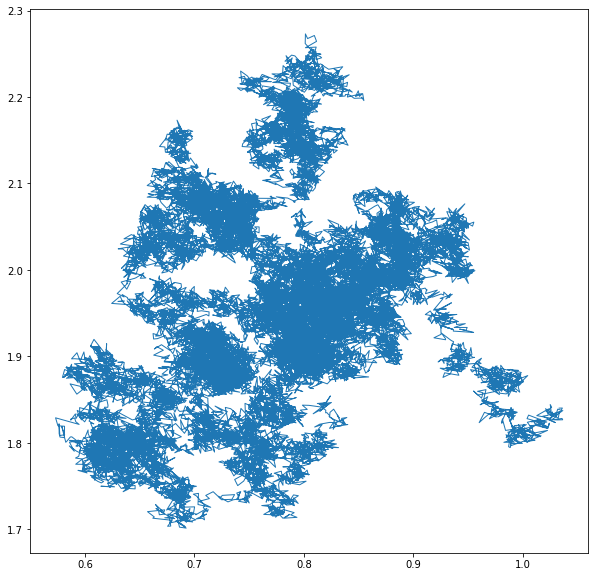

In [0]:
plt.figure(figsize=(10,10))
plt.plot(lo_t1_list[50:30050,0],lo_t1_list[50:30050,1], lw=1)

In [0]:
lo_t1_list.shape

(31801, 2)

In [0]:
len(lo_t1_list)

31801

# Run from here

In [0]:
lo_t1_df = pd.DataFrame()

In [0]:
indexbuffer = 50

In [0]:
lo_t1_df['x'] = lo_t1_list[indexbuffer:30000+indexbuffer, 0]
lo_t1_df['y'] = lo_t1_list[indexbuffer:30000+indexbuffer, 1]
# lo_t1_df['indexcopy'] = lo_t1_df.index

In [0]:
lo_t1_df.head()

,x,y
0,1.033029,1.840179
1,1.035924,1.840278
2,1.034851,1.837770
3,1.031734,1.839013
4,1.029608,1.831199


In [0]:
sum((lo_t1_list[1]-lo_t1_list[5])**2)

0.00014749835995210307

In [0]:
for i in range(min_d_const, max_d_const+1):
    ii = 2**(i-1) #i
    print(i)
    # lo_t1_df['RMSD'+str(i)] = [np.linalg.norm(lo_t1_list[j]-lo_t1_list[j+2**i])\
    #                            for j in range(16000)]
    lo_t1_df['D+'+str(ii)] = [sum((lo_t1_list[j+indexbuffer]
                                  -lo_t1_list[j+indexbuffer+ii])**2)/(4 * ii)\
                            for j in range(30000)]
    lo_t1_df['D-'+str(ii)] = [sum((lo_t1_list[j+indexbuffer]
                                  -lo_t1_list[j+indexbuffer-ii])**2)/(4 * ii)\
                            for j in range(30000)]

1
2
3


In [0]:
lo_t1_df.describe()

,x,y,D+1,D-1,D+2,D-2,D+4,D-4
count,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,0.771044,1.958369,1.546341e-05,1.546367e-05,1.052294e-05,1.052282e-05,7.420959e-06,7.420895e-06
std,0.082544,0.113015,1.701395e-05,1.701389e-05,1.151250e-05,1.151232e-05,7.875142e-06,7.875127e-06
min,0.573201,1.701450,6.841131e-10,6.841131e-10,7.338175e-10,7.338175e-10,7.348938e-11,7.348938e-11
25%,0.710740,1.882991,4.056219e-06,4.056219e-06,2.725100e-06,2.725100e-06,2.003874e-06,2.004837e-06
50%,0.779464,1.953215,1.007257e-05,1.007350e-05,6.859385e-06,6.859540e-06,4.890805e-06,4.890609e-06
75%,0.821190,2.034514,2.065742e-05,2.065742e-05,1.420293e-05,1.420224e-05,1.012438e-05,1.012438e-05
max,1.036368,2.272958,2.048026e-04,2.048026e-04,1.344294e-04,1.344294e-04,7.833318e-05,7.833318e-05


In [0]:
# lo_t1_scaled = pd.DataFrame(skl.preprocessing.scale(lo_t1_df, with_mean=True,
#                             with_std=True, copy=True))
lo_t1_scaled = lo_t1_df

In [0]:
lo_t1_scaled.columns = lo_t1_df.columns
lo_t1_scaled.columns

Index(['x', 'y', 'D+1', 'D-1', 'D+2', 'D-2', 'D+4', 'D-4'], dtype='object')

In [0]:
# for i in range(1, 20, 1):
#     plt.figure(figsize=(10,10))
#     print("---\n\n",i)
#     plt.scatter(lo_t1_df.x, lo_t1_df.y, c=np.floor(lo_t1_df.index/i) % 20,
#                 cmap='hsv', s=10
#                 # , vmin=-0.2, vmax=1.2
#                 )
#     plt.plot(lo_t1_df.x, lo_t1_df.y, 'k', lw=0.1)
#     # plt.scatter(lo_t1_df.x, lo_t1_df.y, c=lo_t1_df.index % i,
#     #             cmap='cividis', s=15
#     #             )
#     plt.show()
#     # plt.clf()

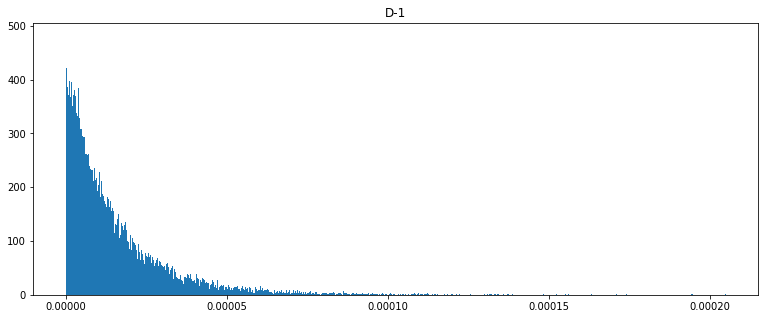

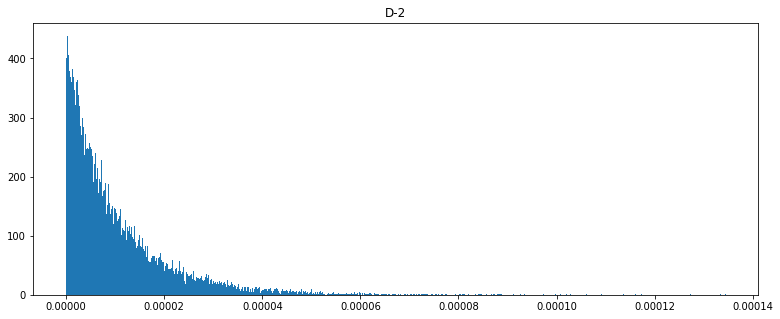

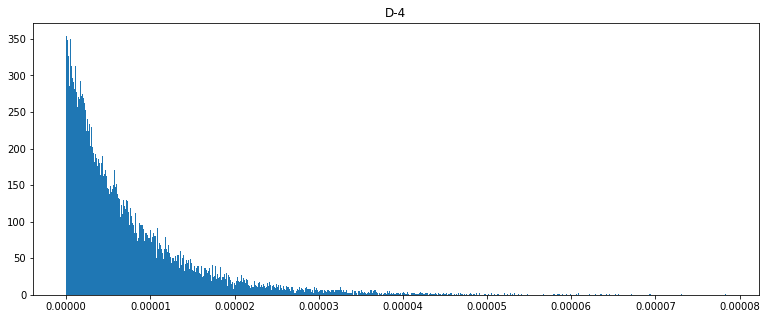

In [0]:
for i in range(min_d_const, max_d_const+1):
    ii = 2**(i-1) #i
    plt.figure(figsize=(13,5))
    plt.hist(lo_t1_scaled["D-"+str(ii)], bins=1000)
    # plt.ylim(-10**-7, 10**-6)
    # plt.yscale('log')
    plt.title("D-"+str(ii))
    # plt.xlim(-2, 10)
    plt.show()

In [0]:
# pd.plotting.scatter_matrix(lo_t1_df, figsize=(40, 40));

In [0]:
def calICVar(X, labels):
    """calculates the intracluster variance
    input 
    X:  an NxM-dimensional feature vecture for N observcations and M features
    labels: an N dimensional vector of labels
    """
    icvar = 0
    # print(np.unique(labels))
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    # print(n, icvar)
    print("intra cluster variance for {} clusters: {:f}".format(n+1, icvar))
    return icvar

intra cluster variance for 1 clusters: 0.000031
intra cluster variance for 2 clusters: 0.000026
intra cluster variance for 3 clusters: 0.000026
intra cluster variance for 4 clusters: 0.000025
intra cluster variance for 5 clusters: 0.000025
intra cluster variance for 6 clusters: 0.000025
intra cluster variance for 7 clusters: 0.000025
intra cluster variance for 8 clusters: 0.000024
intra cluster variance for 9 clusters: 0.000024


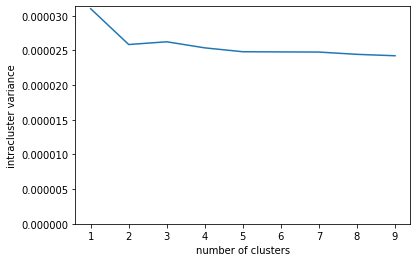

In [0]:
np.random.seed(122409)
tv = []
lo_t1_scale_list = lo_t1_scaled.drop(labels = ["x","y"], axis=1).to_numpy()
for i in range(1, 10):
    km = skl.cluster.k_means(lo_t1_scale_list, i)
    tv.append(calICVar(lo_t1_scale_list, km[1]))
    
plt.plot(range(1,10), tv)
plt.ylim(0)
plt.xlabel("number of clusters")
plt.ylabel("intracluster variance");

In [0]:
lo_t1_scale_list

array([[2.09659553e-06, 1.54137297e-05, 1.14022031e-06, 9.27391369e-06,
        5.77166077e-06, 1.17267935e-05],
       [1.85964861e-06, 2.09659553e-06, 2.39425160e-06, 1.04984083e-05,
        5.33941534e-07, 3.86912764e-06],
       [2.81574875e-06, 1.85964861e-06, 8.83454131e-06, 1.14022031e-06,
        8.67151402e-06, 2.43547495e-06],
       ...,
       [5.08029247e-07, 2.02356715e-05, 2.03514100e-06, 9.98625697e-06,
        6.04401775e-06, 3.02402275e-06],
       [2.20095646e-06, 5.08029247e-07, 3.91302172e-06, 1.28483295e-05,
        1.25018573e-05, 1.18079119e-06],
       [7.61332606e-06, 2.20095646e-06, 1.95609579e-05, 2.03514100e-06,
        2.17528179e-06, 3.43325968e-06]])

In [0]:
diff_kmclust = skl.cluster.KMeans(n_clusters = 2,
                                   random_state=222317).fit(lo_t1_scale_list)

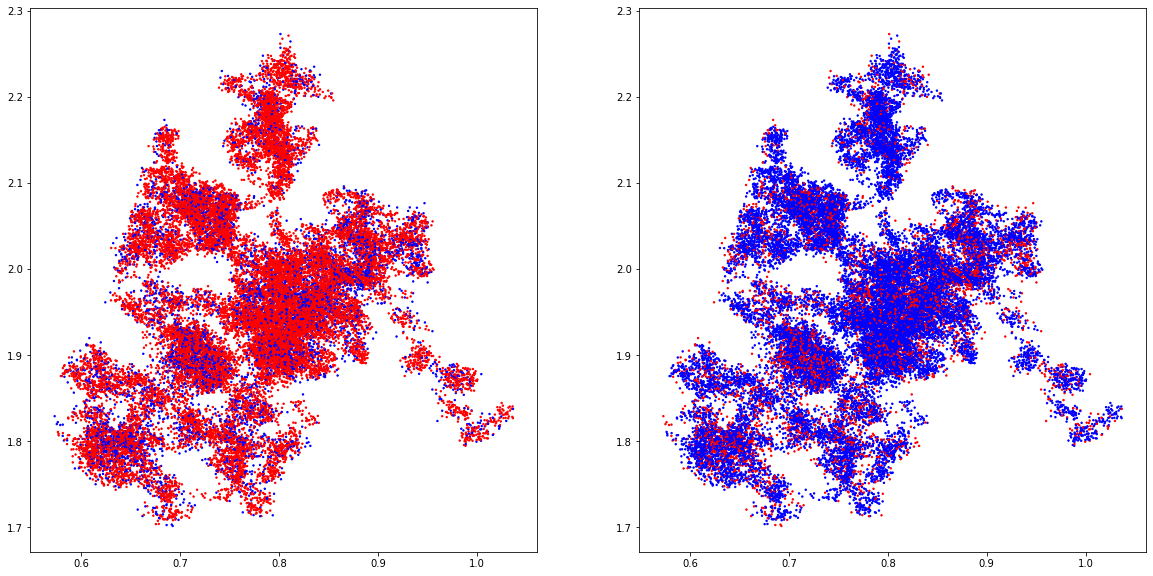

In [0]:
# cc = np.array([4,0,3,0,2])
# cc = np.array([1.9,1.9,1.9,1.9,4])
cc = np.array([0, 1, 2, 3, 4])

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(lo_t1_list[indexbuffer:30000+indexbuffer,0], lo_t1_list[indexbuffer:30000+indexbuffer,1], c=cc[diff_kmclust.labels_],
            alpha=1, s=2, cmap="bwr",vmin=0)
# plt.plot(lo_t1_df.x, lo_t1_df.y, 'k', lw=0.1)
# plt.colorbar()
# plt.show()

plt.subplot(122)
plt.scatter(lo_t1_list[indexbuffer:30000+indexbuffer,0], lo_t1_list[indexbuffer:30000+indexbuffer,1], c=diff_kmclust.labels_,
            alpha=1, s=2, cmap="bwr_r")
# plt.colorbar()

500


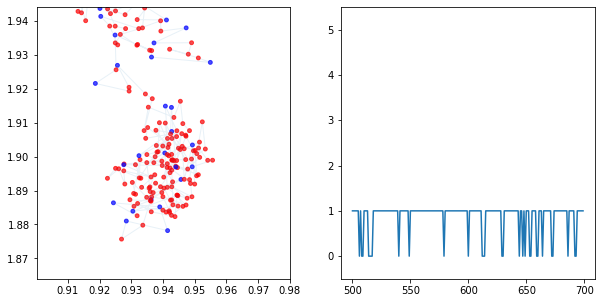

1000


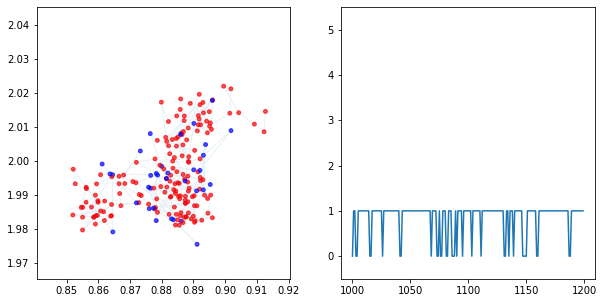

1500


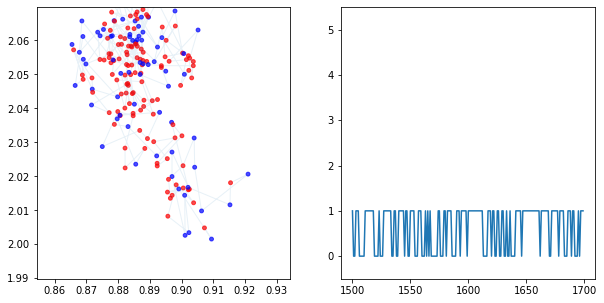

2000


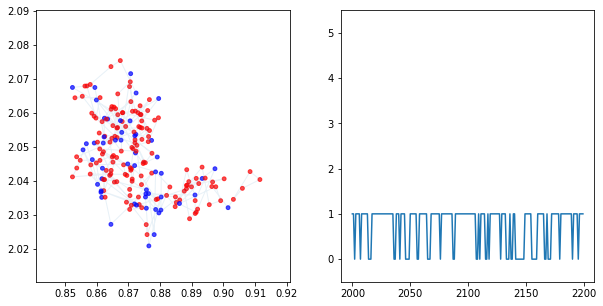

2500


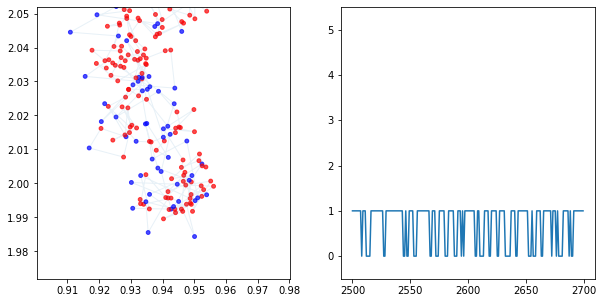

3000


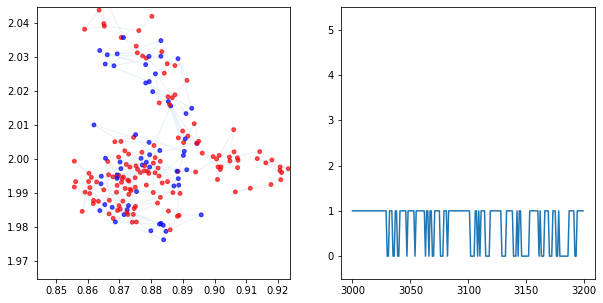

3500


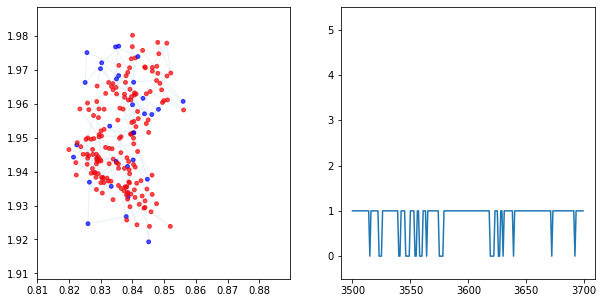

4000


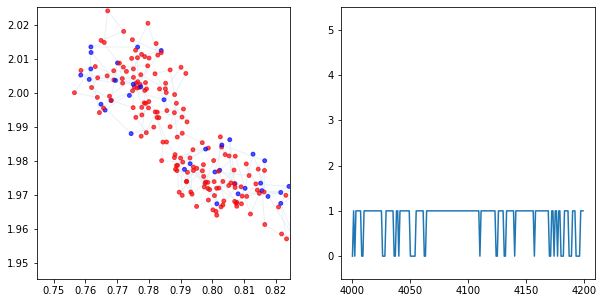

4500


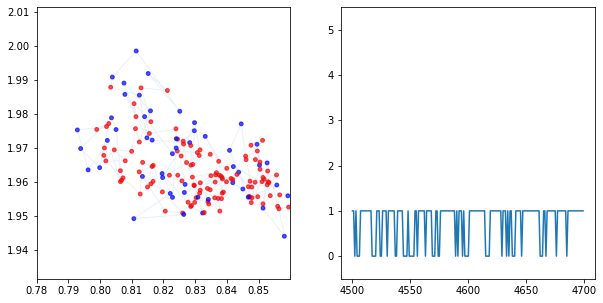

5000


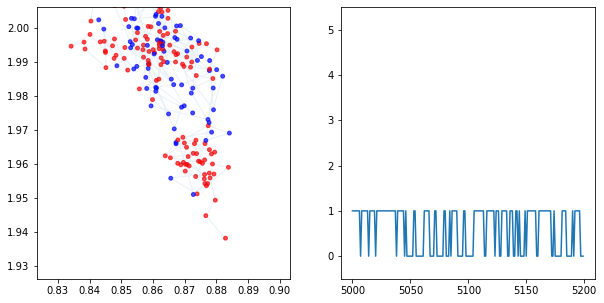

5500


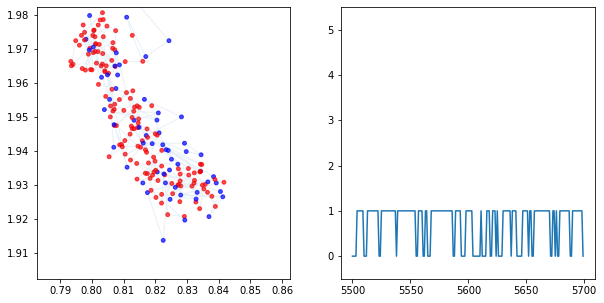

6000


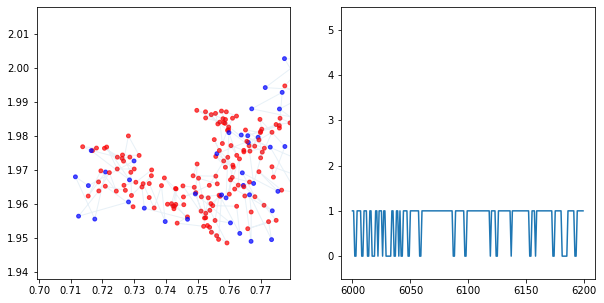

6500


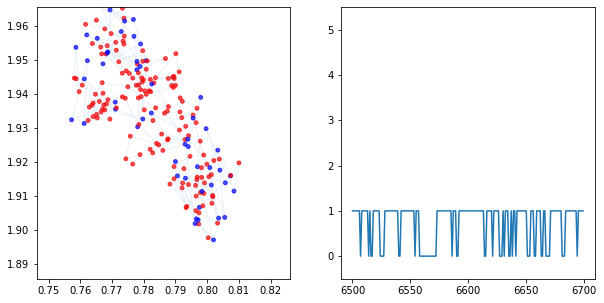

7000


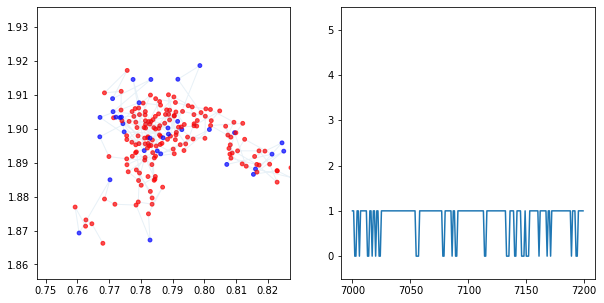

7500


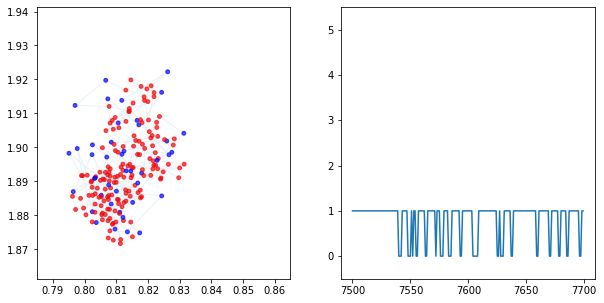

8000


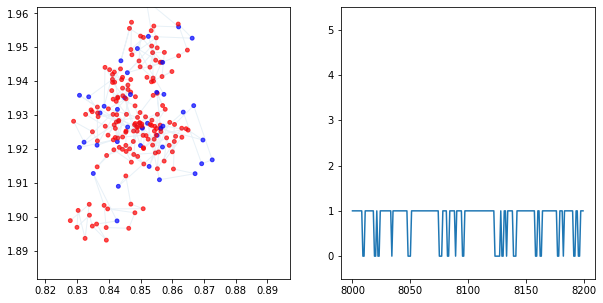

8500


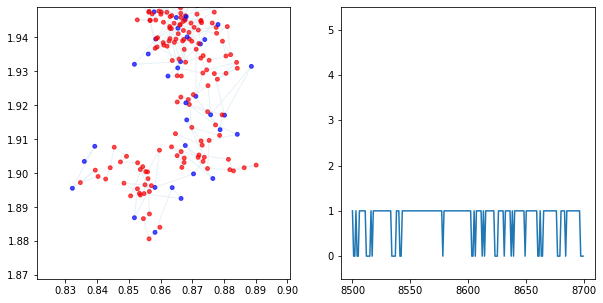

9000


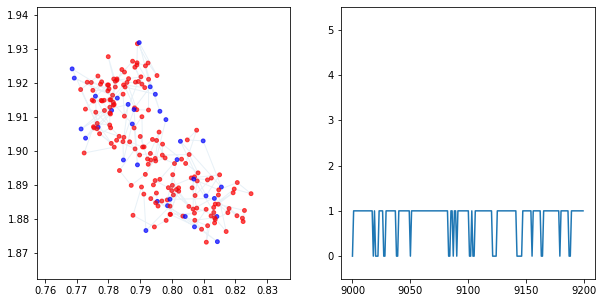

9500


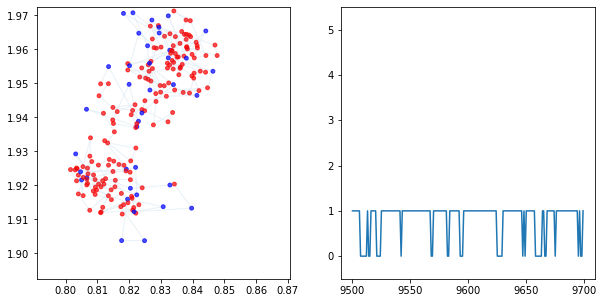

10000


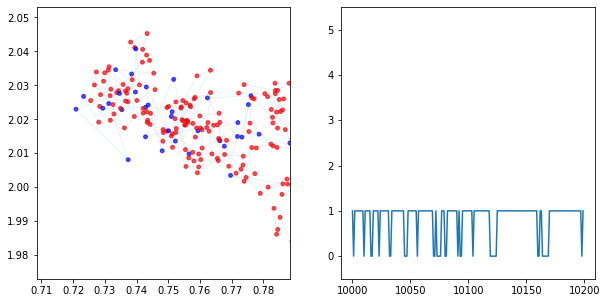

10500


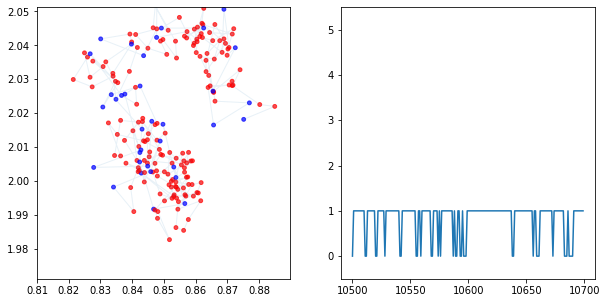

11000


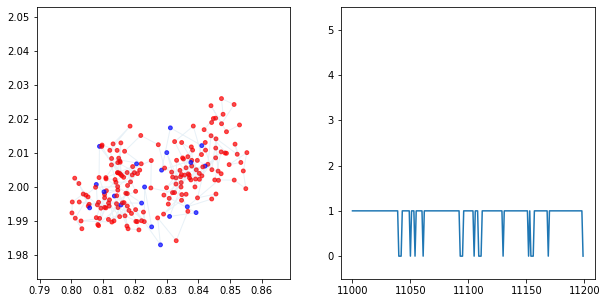

11500


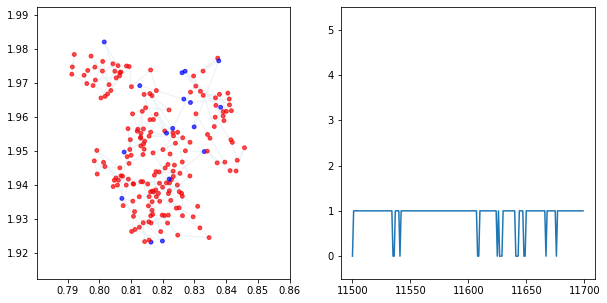

12000


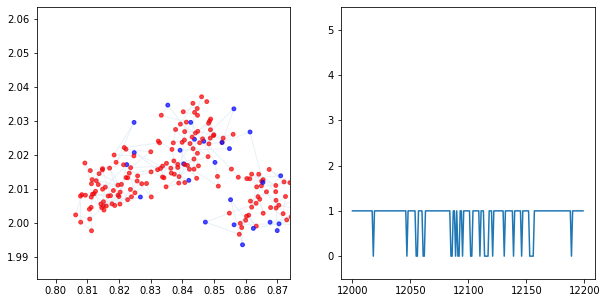

12500


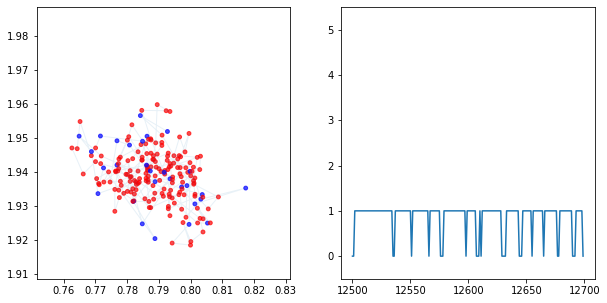

13000


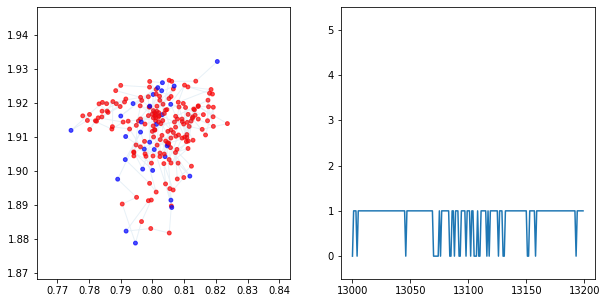

13500


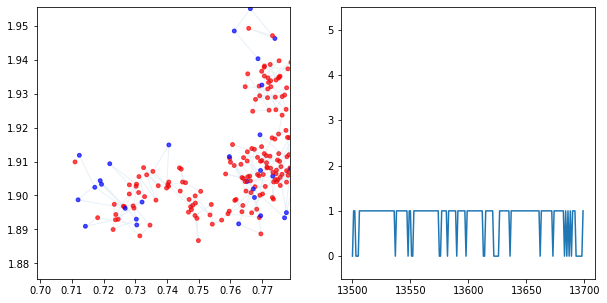

14000


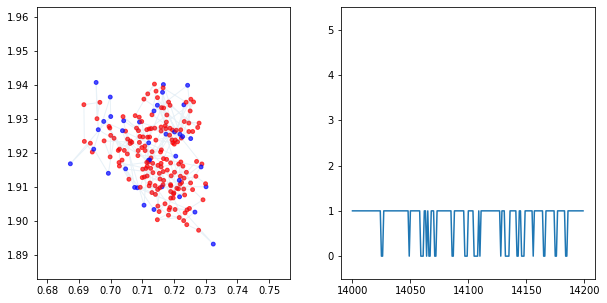

14500


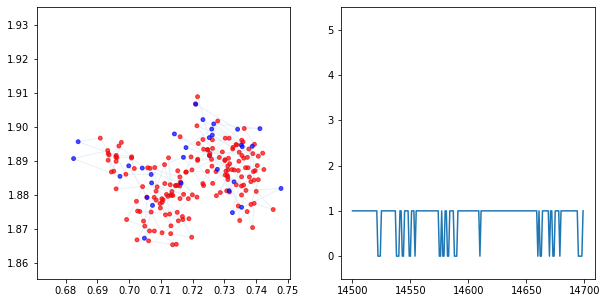

15000


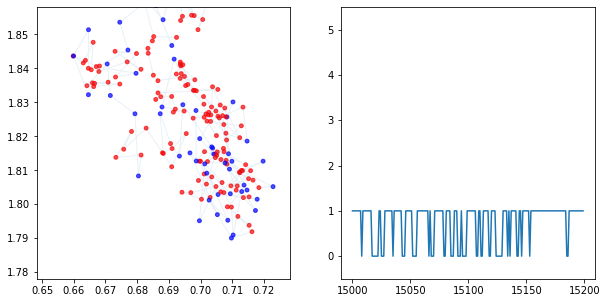

15500


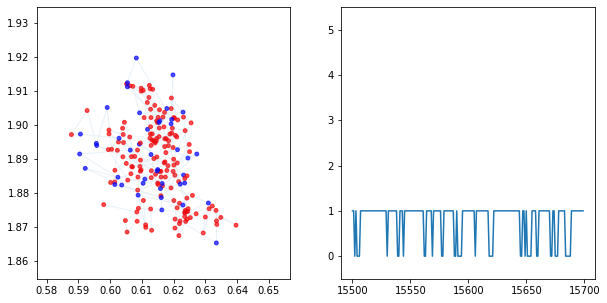

16000


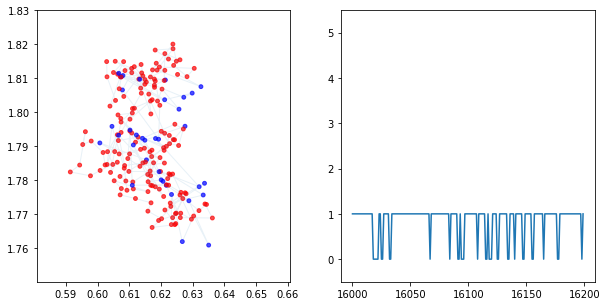

16500


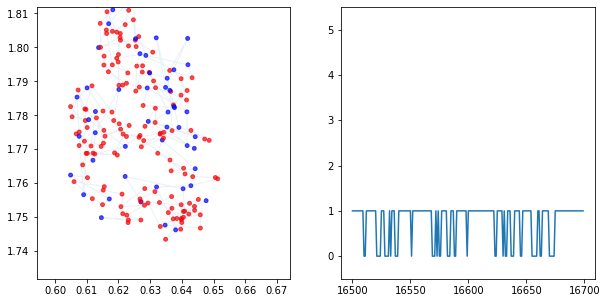

17000


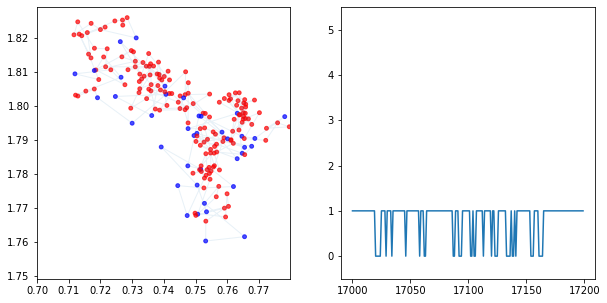

17500


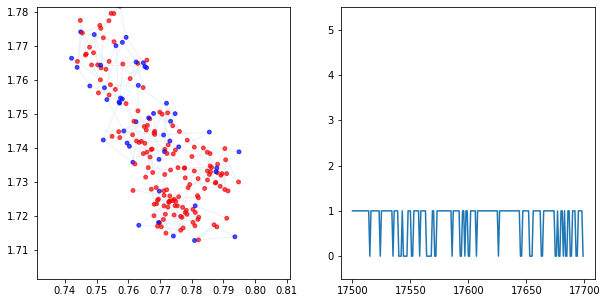

18000


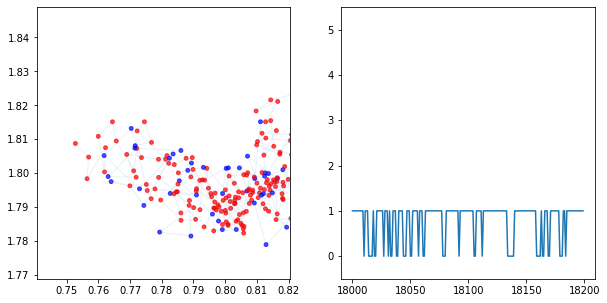

18500


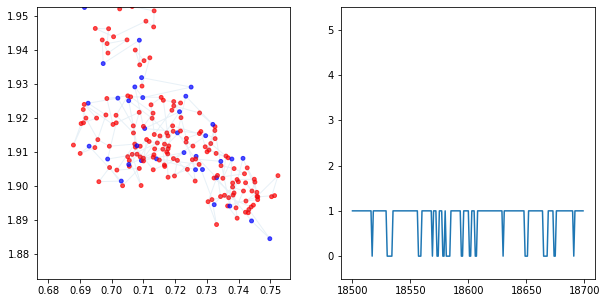

19000


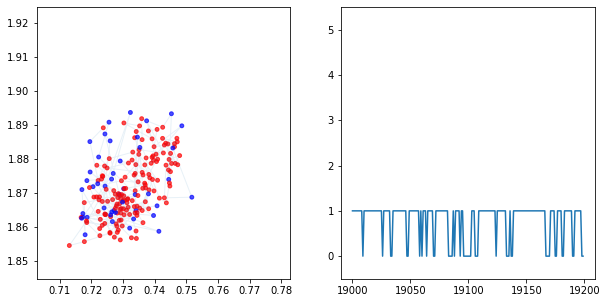

19500


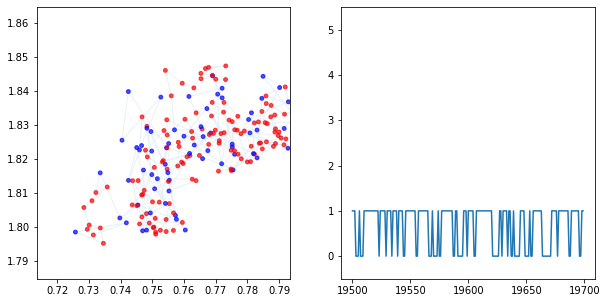

20000


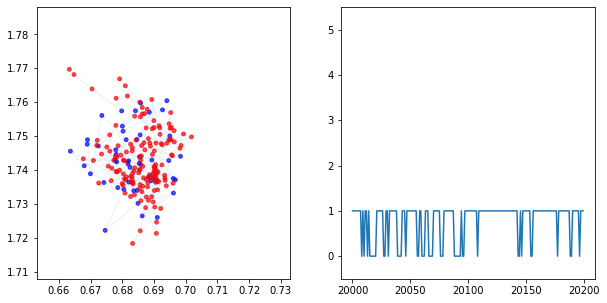

20500


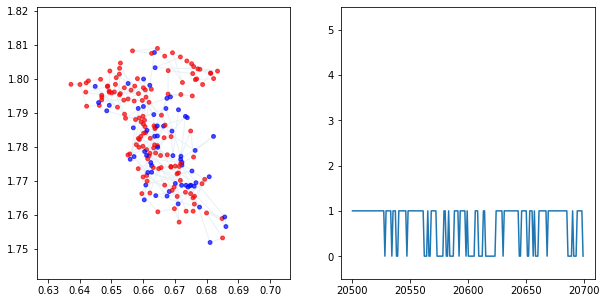

21000


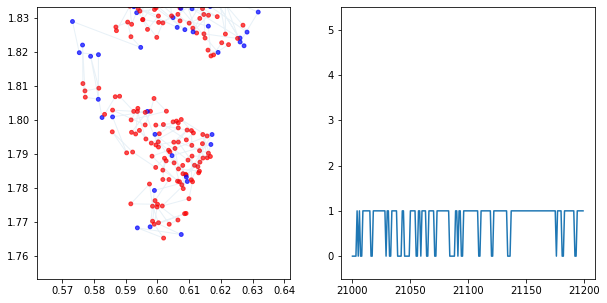

21500


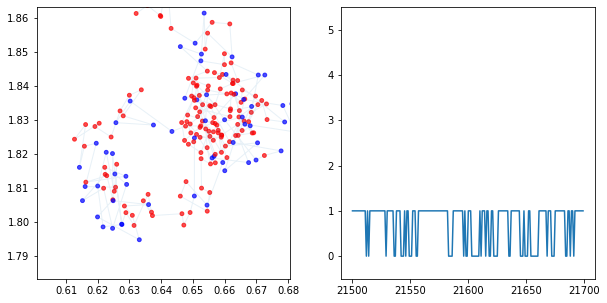

22000


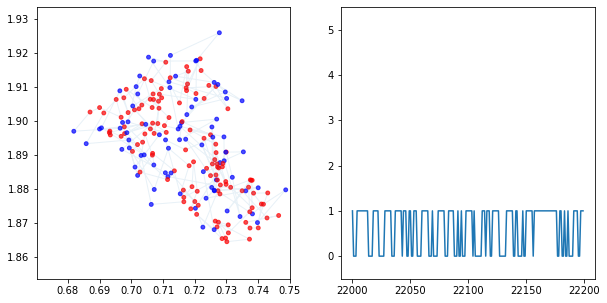

22500


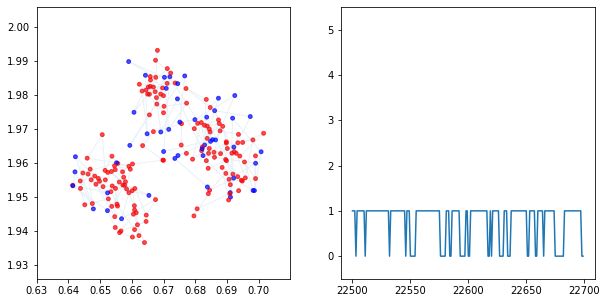

In [0]:
sizee = 15
alphaa = 0.7
pl_len = 200
pl_start = 0
# plt.scatter(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
#             lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
#             c=lo_t1_agcluster.labels_[pl_start:pl_len],
#             s=sizee, alpha=alphaa, cmap='bwr')



for pl_start in np.arange(500, 23000, 500):
    print(pl_start)
    plt.figure(figsize=(10,5))
    plt.subplot(121)

    plt.scatter(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
                lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
                c=cc[diff_kmclust.labels_[pl_start:pl_start+pl_len]],
                s=sizee, alpha=alphaa, cmap='bwr')
    plt.plot(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
             lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
             lw=1, alpha=0.1)
    
    bigger = 0.08
    plt.xlim(plt.xlim()[0],plt.xlim()[0]+bigger)
    plt.ylim(plt.ylim()[0],plt.ylim()[0]+bigger)
    
    plt.subplot(122)
    plt.plot(np.arange(pl_start, pl_start+pl_len), diff_kmclust.labels_[pl_start:pl_start+pl_len])
    plt.ylim(-0.5,5.5)
    plt.show()

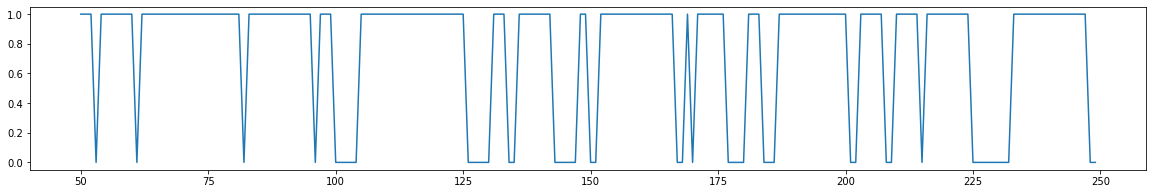

In [0]:
plt.figure(figsize=(20,3))
plt.plot(np.arange(indexbuffer, pl_len+indexbuffer), diff_kmclust.labels_[pl_start:pl_start+pl_len])

**Decision: KMeans might not be great**

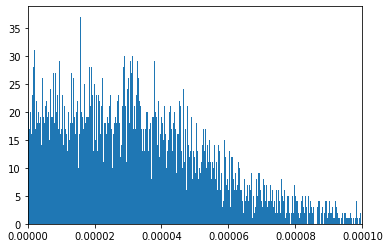

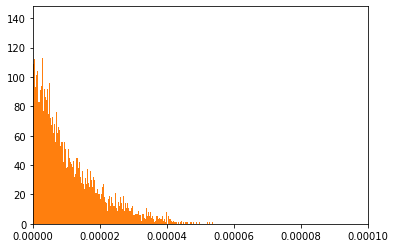

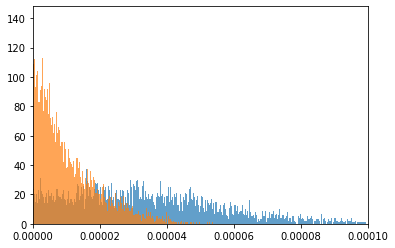

In [0]:
# lo_t1_df['D1'] = [sum((lo_t1_list[j]-lo_t1_list[j+1])**2)/(4 * 1)\
#                             for j in range(30000)]
xmax=0.0001

plotter0 = np.where(diff_kmclust.labels_==0, lo_t1_scaled["D+1"], np.nan)
plotter0 = plotter0[~np.isnan(plotter0)]
plt.hist(plotter0, bins=1000, color="C0")
plt.xlim(0,xmax)
plt.show()

plotter1 = np.where(diff_kmclust.labels_==1, lo_t1_scaled["D+1"], np.nan)
plotter1 = plotter1[~np.isnan(plotter1)]
plt.hist(plotter1, bins=1000, color="C1")
plt.xlim(0,xmax)
plt.show()

# plotter2 = np.where(diff_kmclust.labels_==2, lo_t1_df["D+1"], np.nan)
# plotter2 = plotter2[~np.isnan(plotter2)]
# plt.hist(plotter2, bins=1000)
# plt.xlim(0,xmax)
# plt.show()

# plotter3 = np.where(diff_kmclust.labels_==3, lo_t1_df["D+1"], np.nan)
# plotter3 = plotter3[~np.isnan(plotter3)]
# plt.hist(plotter3, bins=1000)
# plt.xlim(0,xmax)
# plt.show()

# plotter4 = np.where(diff_kmclust.labels_==4, lo_t1_df["D+1"], np.nan)
# plotter4 = plotter4[~np.isnan(plotter4)]
# plt.hist(plotter4, bins=1000)
# plt.xlim(0,xmax)
# plt.show()


# plt.hist(plotter2, bins=1000, alpha=0.7)
# plt.hist(plotter3, bins=1000, alpha=0.7)
# plt.hist(plotter4, bins=1000, alpha=0.7)
plt.hist(plotter0, bins=1000, alpha=0.7)
plt.hist(plotter1, bins=1000, alpha=0.7)
plt.xlim(0,xmax)
plt.show()

In [0]:
# distance_mat = sp.spatial.distance.pdist(lo_t1_scale_list[:30000],
#                                          metric = 'euclidean')

# # plt.figure(figsize = (12,12))

# # plt.imshow(sp.spatial.distance.squareform(distance_mat), cmap='magma'
# #             # , vmax=0.00010, vmin=0
# #           )

# # plt.colorbar()

# # # plt.title("Distance matrix for the 74-dimensional,\
# # #  discriptionless 'genes' dataset")
# # plt.xlabel("Index")

# plt.figure(figsize = (10,3))
# plt.hist(distance_mat, bins = 1000);
# plt.title("Histogram of the distances between points")
# plt.xlabel("Distance")
# plt.ylabel("Frequency")
# plt.show()

# plt.figure(figsize = (10,3))
# plt.hist(distance_mat, bins = 1000);
# plt.xlim(0.5,3)
# plt.xlabel("Distance")
# plt.ylabel("Frequency")
# plt.show()

# None;

In [0]:
# distance_mat.mean()

In [0]:
# def customfitness(nclusters,nnoise,labels):
#     fitness = (nclusters-1)*nclusters * (len(labels) - nclusters)/(nnoise+1)**2*len(labels)
#     return(int(fitness))
# 
# 
# 
# # print('ee \t mm \t nclus \t nnoise')
# # for mm in np.arange(1000, 10000, 500):
# for i in range(10000):
#     mm = min(np.random.randint(10,60,3))
#     emin = 0.01
#     emax = 0.8 #2.2 is max without crashing
#     ee = np.random.rand()*(emax-emin)+emin
#     if i%20 == 0:
#         print('\n-------')
#         print('ee\tmm\tnclus\tnnoise\tcustom fitness score')
#     # for ee in np.arange(0.7, 2.0, 0.2):
#     # mm = 2000 #1k too low
#     # ee = 1.2

#     dbs = skl.cluster.DBSCAN(eps=ee, min_samples=mm)
#     dbs.fit(lo_t1_scale_list)
#     # print(dbs.fit(genes_scaled))


#     ##


#     labels = dbs.labels_

#     # Number of clusters in labels, ignoring noise if present.
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise_ = list(labels).count(-1)
#     print(f'{ee:0.2f}', '\t', mm, '\t', n_clusters_, '\t',
#             n_noise_, '\t', customfitness(n_clusters_, n_noise_, labels))

In [0]:
# dbs = skl.cluster.DBSCAN(eps=0.11, min_samples=11)
# dbs.fit(lo_t1_scale_list)
# labels = dbs.labels_

In [0]:
# # pl.figure(figsize=(10,10))

# plt.figure(figsize=(20,10))
# plt.subplot(121)
# plt.scatter(lo_t1_list[:30000,0], lo_t1_list[:30000,1], c=labels,
#             alpha=1, s=2, cmap="gray")
# plt.colorbar()

# # pl.scatter(twodproj[:,0], twodproj[:,1],  c=(labels), cmap='magma', vmax=2.5)
# # plt.colorbar()
# # plt.title("Clustering via DBSCAN")

# plt.subplot(122)
# plt.scatter(lo_t1_list[:30000,0], lo_t1_list[:30000,1], c=labels,
#             alpha=1, s=2, cmap="gray_r")
# plt.colorbar()
# None;

Let's try some tree methods

In [0]:
# sp.cluster.hierarchy.set_link_color_palette(['C0','C1','C2','C3','C4','C5'])

In [0]:
links_lo_t1 = linkage(lo_t1_scale_list[:5000], method='ward')

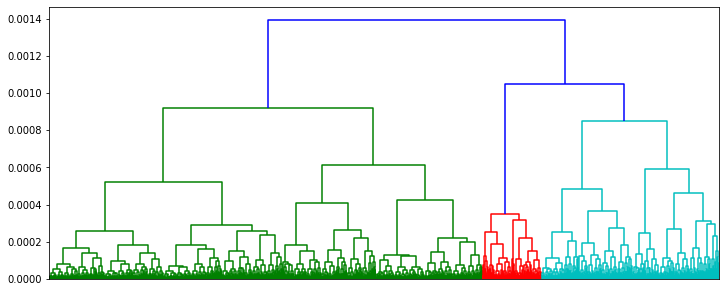

In [0]:
plt.figure(figsize=(12,5))
dendrogram(links_lo_t1, p=10, truncate_mode='level', no_labels=True);

In [0]:
tv_ag = []

leng = 15000

np.random.seed(150110)

for i in range(1, 10):
    agger = skl.cluster.AgglomerativeClustering(n_clusters = i, linkage='ward').fit(
        lo_t1_scale_list[:leng])
    km = agger.labels_
    tv_ag.append(calICVar(lo_t1_scale_list[:leng], agger.labels_))

intra cluster variance for 1 clusters: 0.000016
intra cluster variance for 2 clusters: 0.000014
intra cluster variance for 3 clusters: 0.000014
intra cluster variance for 4 clusters: 0.000014
intra cluster variance for 5 clusters: 0.000013
intra cluster variance for 6 clusters: 0.000013
intra cluster variance for 7 clusters: 0.000013
intra cluster variance for 8 clusters: 0.000013
intra cluster variance for 9 clusters: 0.000013


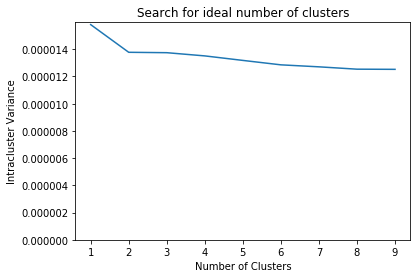

In [0]:
plt.plot(range(1,10), tv_ag)
plt.title("Search for ideal number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Intracluster Variance")
plt.ylim(0)
None;

In [0]:
leng = 8000

lo_t1_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(
    lo_t1_scale_list[:leng])



500


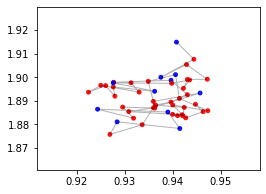

1000


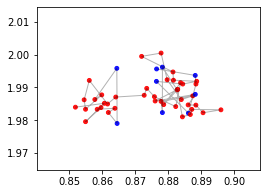

1500


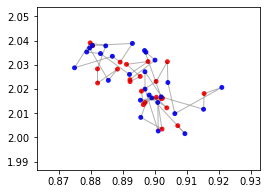

2000


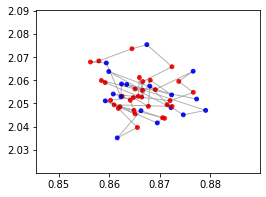

2500


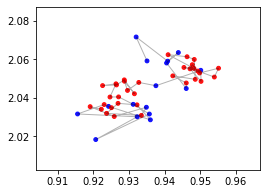

3000


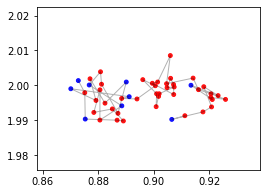

3500


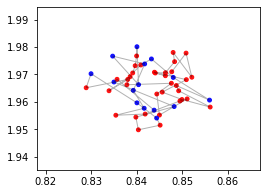

4000


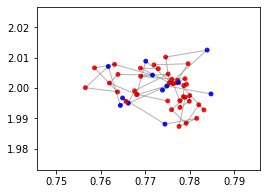

4500


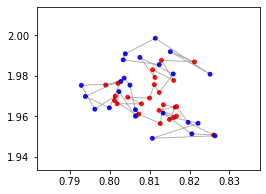

5000


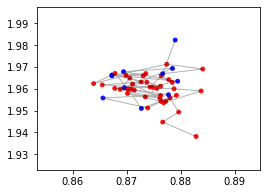

5500


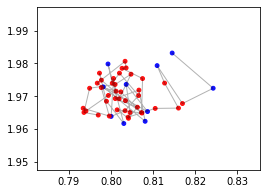

6000


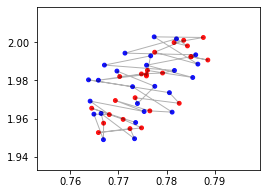

6500


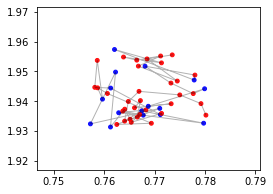

7000


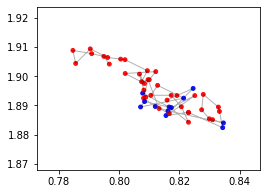

7500


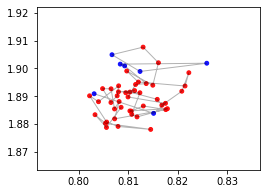

8000


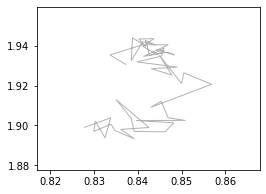

8500


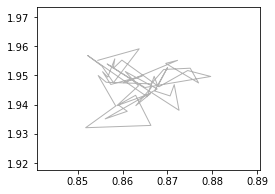

9000


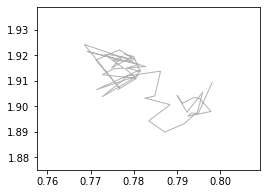

9500


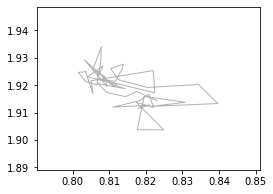

10000


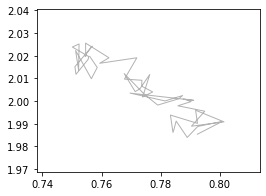

10500


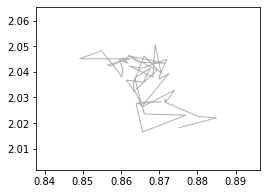

11000


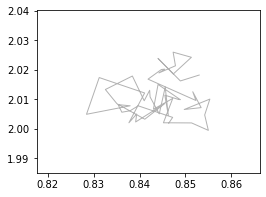

11500


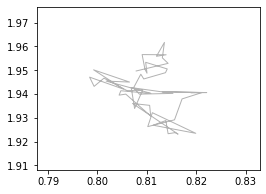

12000


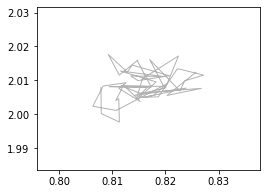

12500


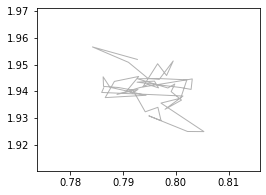

13000


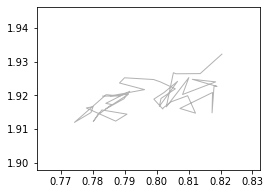

13500


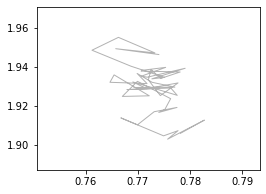

14000


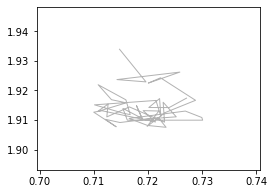

14500


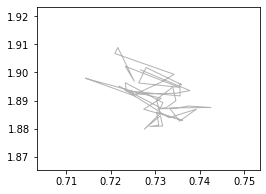

15000


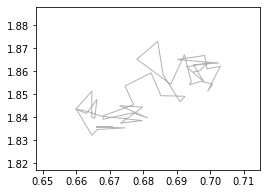

15500


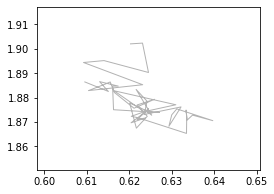

16000


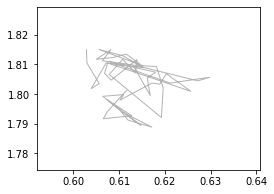

16500


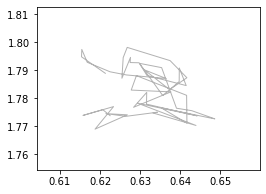

17000


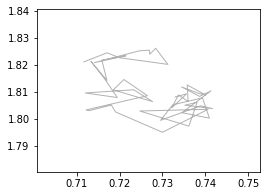

17500


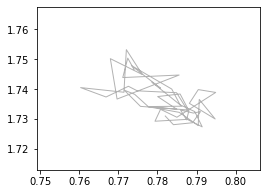

18000


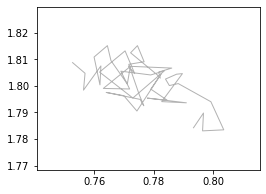

18500


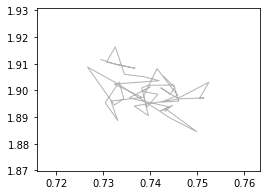

19000


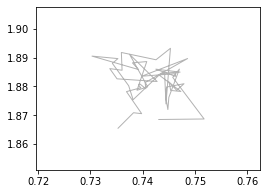

19500


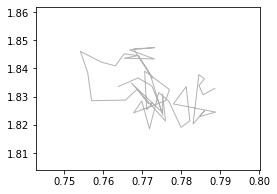

20000


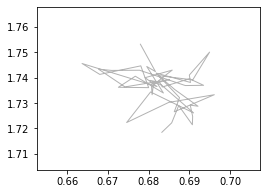

20500


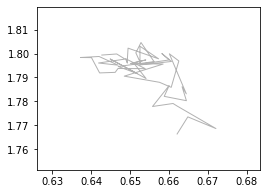

21000


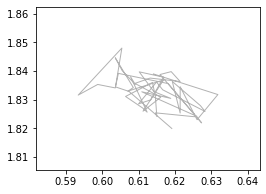

21500


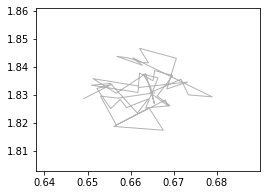

22000


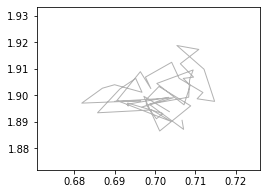

22500


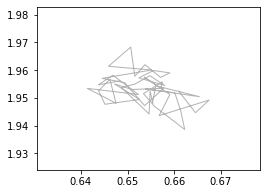

In [0]:

# plt.subplot(121)
sizee = 15
alphaa = 0.9
pl_len = 50
pl_start = 0
# plt.scatter(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
#             lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
#             c=lo_t1_agcluster.labels_[pl_start:pl_len],
#             s=sizee, alpha=alphaa, cmap='bwr')

for pl_start in np.arange(500, 23000, 500):
    print(pl_start)
    plt.figure(figsize=(4,3))
    plt.scatter(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
                lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
                c=lo_t1_agcluster.labels_[pl_start:pl_start+pl_len],
                s=sizee, alpha=alphaa, cmap='bwr')
    plt.plot(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
             lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1], 'k', lw=1, alpha=0.3)
    plt.show()

In [0]:
# leng = 15000 #can easily be 25000, but it takes longer

# looper = [['ward','RdGy'] , ['average','PuOr'], ['complete','BrBG'], ['single','PiYG']]

# for _linkage, _cmap in looper:
#     plt.figure(figsize=(11,11))
#     print("Clustering:")
#     lo_t1_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=2,
#                                                         linkage=_linkage).fit(
#         lo_t1_scale_list[:leng])
#     print("Done clustering. Plotting:")

#     plt.scatter(lo_t1_list[indexbuffer:leng+indexbuffer,0],
#             lo_t1_list[indexbuffer:leng+indexbuffer,1],
#             c=lo_t1_agcluster.labels_[:leng],
#             s=sizee, alpha=alphaa, cmap=_cmap, vmin=-0.3, vmax=1.3)
    
#     for pl_start in np.arange(500, leng-1000, 500):
#         print(pl_start)
#         plt.figure(figsize=(4,3))
#         plt.scatter(lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,0],
#                     lo_t1_list[pl_start+indexbuffer:pl_start+pl_len+indexbuffer,1],
#                     c=lo_t1_agcluster.labels_[pl_start:pl_start+pl_len],
#                     s=sizee, alpha=alphaa, cmap=_cmap, vmin=-0.3, vmax=1.3)
#         plt.show()
#     print("███╗   ██╗███████╗██╗  ██╗████████╗\n████╗  ██║██╔════╝╚██╗██╔╝╚══██╔══╝\n██╔██╗ ██║█████╗   ╚███╔╝    ██║   \n██║╚██╗██║██╔══╝   ██╔██╗    ██║   \n██║ ╚████║███████╗██╔╝ ██╗   ██║   \n╚═╝  ╚═══╝╚══════╝╚═╝  ╚═╝   ╚═╝")